In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X = cancer.data
y= cancer.target
pd.DataFrame(X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit(X).transform(X)  ##X에 대해 각각 x와y에 대한 평균과 분포를 스케일드 하는것을 X_scaled에 넣겟다.
##새로운 도메인으로 뿌리는역활
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0)

In [2]:
LR= LogisticRegression(C=0.1) ###

In [3]:
LR.fit(X_train,y_train)

LogisticRegression(C=0.1)

In [4]:
LR.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [5]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [6]:
LR.score(X_train,y_train)

0.9859154929577465

In [7]:
LR.score(X_test,y_test)

0.965034965034965

In [8]:
training_accuracy = []
testing_accuracy = []
regularizer = []

In [9]:
for i in range(1,101):
    C = i* 0.01 ##0.01~1, 0.01
    LR = LogisticRegression(C=C)
    LR.fit(X_train,y_train)
    
    regularizer.append(C)
    training_accuracy.append(LR.score(X_train,y_train))
    testing_accuracy.append(LR.score(X_test,y_test))

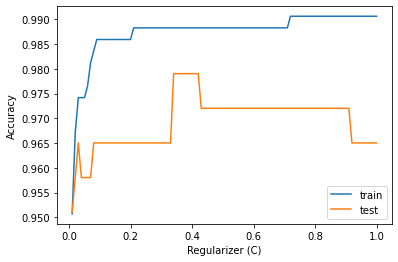

In [10]:
plt.plot(regularizer,training_accuracy)
plt.plot(regularizer,testing_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Regularizer (C)')
plt.legend(['train','test'], loc = 'lower right') 

## kears

keras = backend engine

keras <-- Tensorflow <-- cuDA, cuDNN (GPU)

keras <-- Tensorflow <-- BLAS, Eigen (CPU)

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras import backend

In [12]:
model = Sequential()

In [13]:
input_shape = X.shape[1]

In [14]:
model.add(Dense(1, activation = 'sigmoid',
               kernel_regularizer = L1L2(l2=0.3),
               input_dim=input_shape))


In [15]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [16]:
model.fit(X_train,y_train,epochs = 500)

Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 1.9868 - accuracy: 0.1479
Epoch 2/500
14/14 [==============================] - 0s 1ms/step - loss: 1.8267 - accuracy: 0.1573
Epoch 3/500
14/14 [==============================] - 0s 1ms/step - loss: 1.6826 - accuracy: 0.2042
Epoch 4/500
14/14 [==============================] - 0s 1ms/step - loss: 1.5505 - accuracy: 0.2723
Epoch 5/500
14/14 [==============================] - 0s 1ms/step - loss: 1.4322 - accuracy: 0.3263
Epoch 6/500
14/14 [==============================] - 0s 1ms/step - loss: 1.3269 - accuracy: 0.3826
Epoch 7/500
14/14 [==============================] - 0s 1ms/step - loss: 1.2327 - accuracy: 0.4460
Epoch 8/500
14/14 [==============================] - 0s 1ms/step - loss: 1.1529 - accuracy: 0.5211
Epoch 9/500
14/14 [==============================] - 0s 1ms/step - loss: 1.0799 - accuracy: 0.5915
Epoch 10/500
14/14 [==============================] - 0s 1ms/step - loss: 1.0176 - accuracy: 0.6714
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.9460
Epoch 84/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3398 - accuracy: 0.9460
Epoch 85/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3395 - accuracy: 0.9460
Epoch 86/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3394 - accuracy: 0.9460
Epoch 87/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.9460
Epoch 88/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.9460
Epoch 89/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3389 - accuracy: 0.9460
Epoch 90/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.9460
Epoch 91/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.9460
Epoch 92/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3384 - accuracy: 0.9437
Epoch 93/500


14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 165/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 166/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 167/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 168/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 169/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 170/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 171/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 172/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 173/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 246/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 247/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 248/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 249/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 250/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 251/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 252/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9390
Epoch 253/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 254/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 327/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 328/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 329/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.9413
Epoch 330/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 331/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 332/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 333/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 334/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 335/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 408/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 409/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 410/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 411/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 412/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 413/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9413
Epoch 414/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 415/500
14/14 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 416/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoc

14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 489/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 490/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 491/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 492/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 493/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 494/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 495/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 496/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoch 497/500
14/14 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.9413
Epoc

In [17]:
train_result = model.evaluate(X_train,y_train)
test_result = model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.3340 - accuracy: 0.9510


In [18]:
training_loss = []
testing_loss = []

training_accuracy = []
testing_accuracy = []
regularizer = []

In [19]:
for i in range(1,10):
    l2 = i* 0.01 ##0.01~1, 0.01
    model = Sequential()
    input_shape = X.shape[1]
    model.add(Dense(1, 
                    activation = 'sigmoid',
                   kernel_regularizer = L1L2(l2=l2),
                   input_dim=input_shape))
    model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])
    model.fit(X_train,y_train,epochs=500,verbose=0)
    train_result = model.evaluate(X_train,y_train,verbose = 0)
    test_result = model.evaluate(X_test,y_test,verbose = 0)
    
    
    regularizer.append(l2)
    training_loss.append(train_result[0])
    testing_loss.append(test_result[0])
    training_accuracy.append(train_result[1])
    testing_accuracy.append(test_result[1])

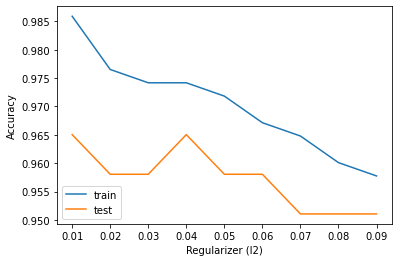

In [20]:
plt.plot(regularizer,training_accuracy)
plt.plot(regularizer,testing_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Regularizer (l2)')
plt.legend(['train','test'], loc = 'lower left')

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
from keras import backend

In [22]:
X=np.array([[0,0],[0,1],[1,0],[1,1]],"float32")
y=np.array([[0],[1],[1],[0]],"float32")

In [23]:
model = Sequential()
input_shape = X.shape[1]
model.add(Dense(1,activation = 'sigmoid',
               input_dim = input_shape))
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [24]:
result = model.fit(X,y,epochs = 500, verbose = 0)

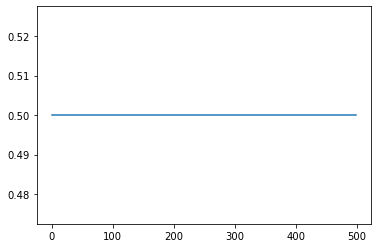

In [25]:
plt.plot(result.history["accuracy"])

In [26]:
backend.clear_session()

In [27]:
model = Sequential()
input_shape = X.shape[1]
model.add(Dense(16,activation = 'sigmoid',
               input_dim = input_shape))
model.add(Dense(1,activation = 'sigmoid'))   ##자동으로 keras가 잡아줌   ##sigmoid는 0,1결정
##relu는 보통 가운데 과정에서 사용
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [28]:
result = model.fit(X,y,epochs = 10000, verbose = 0)

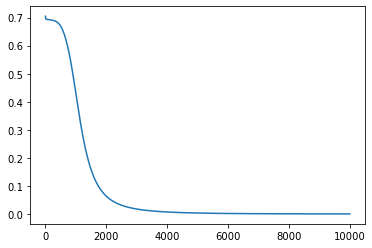

In [29]:
plt.plot(result.history["loss"])

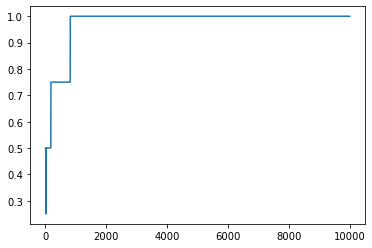

In [30]:
plt.plot(result.history["accuracy"])

In [31]:
from keras.datasets import mnist

In [32]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [33]:
X_train.shape

(60000, 28, 28)

In [34]:
X_test.shape

(10000, 28, 28)

In [35]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Text(0.5, 1.0, 'label:0')

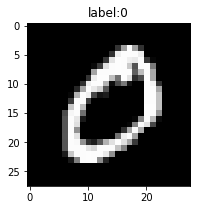

In [36]:
plt.figure(figsize=(5,3))
plt.imshow(X_train[1,:,:],'gray')
plt.title("label:{}".format(y_train[1]))

C:\Users\home\AppData\Local\Temp/ipykernel_23120/4134984059.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,3))


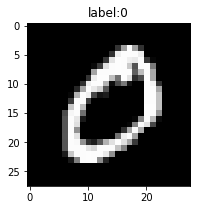

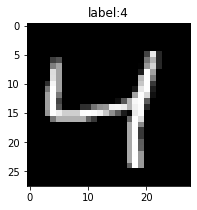

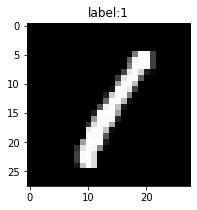

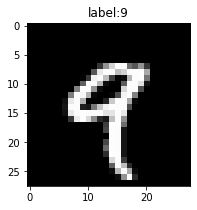

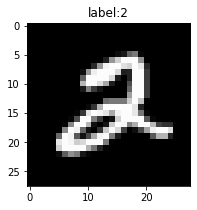

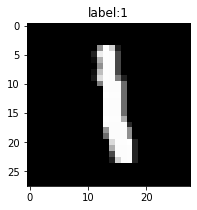

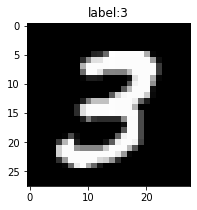

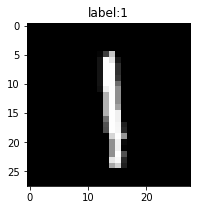

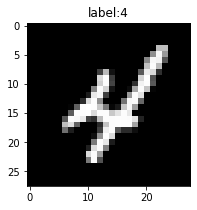

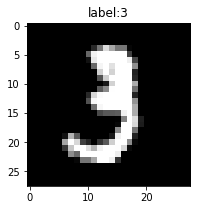

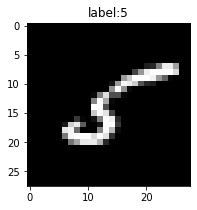

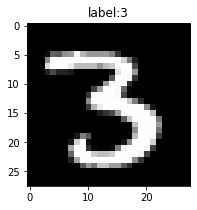

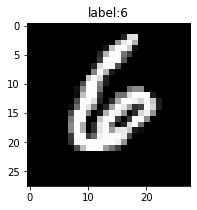

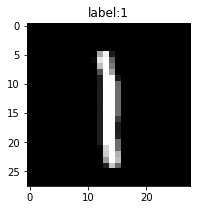

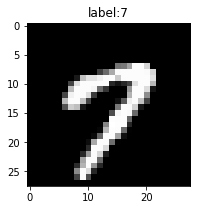

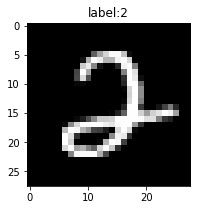

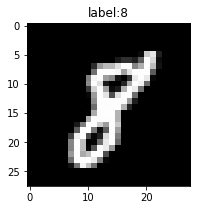

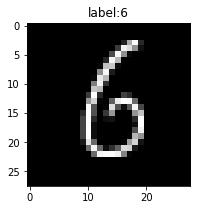

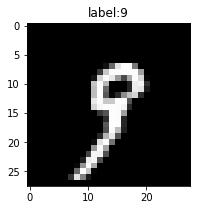

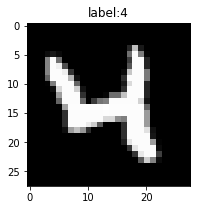

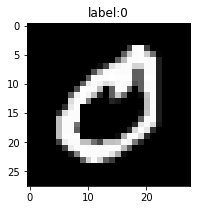

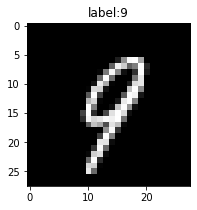

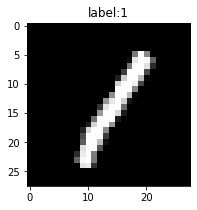

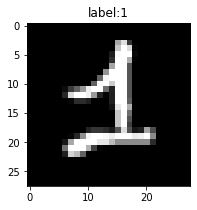

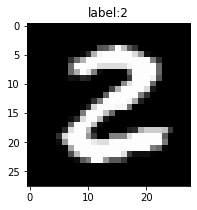

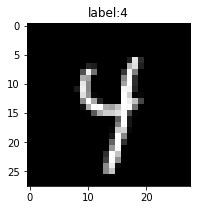

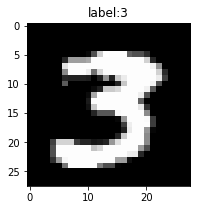

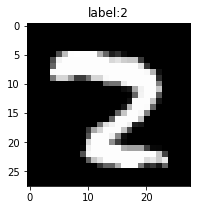

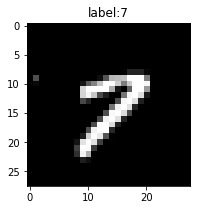

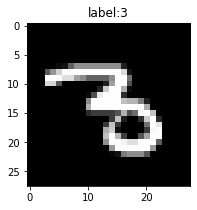

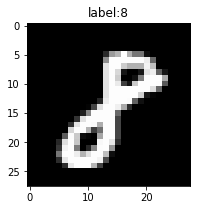

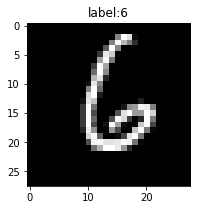

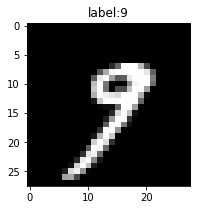

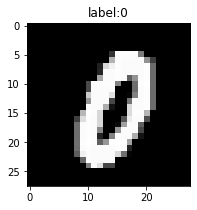

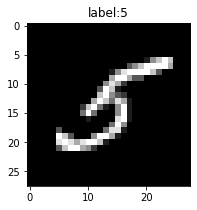

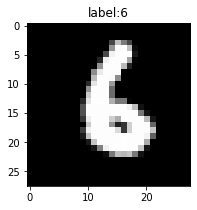

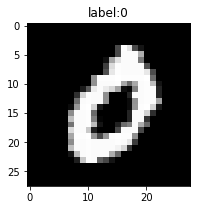

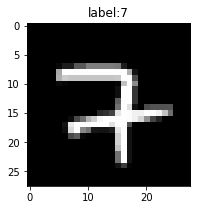

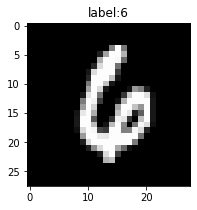

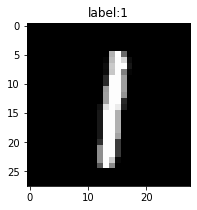

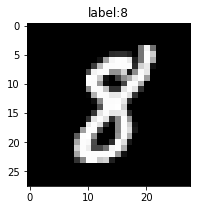

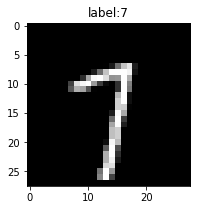

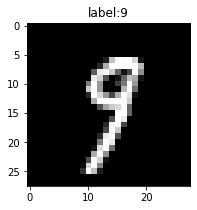

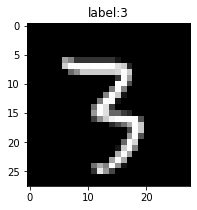

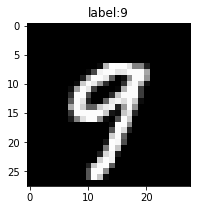

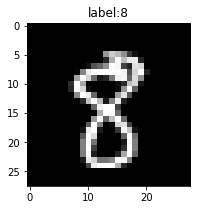

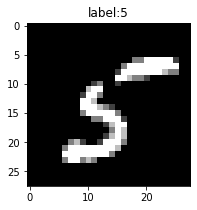

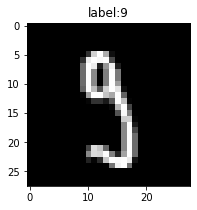

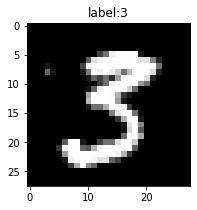

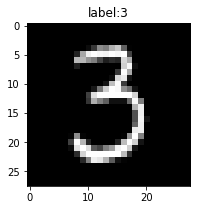

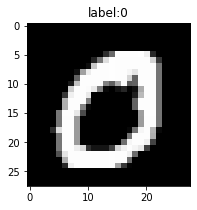

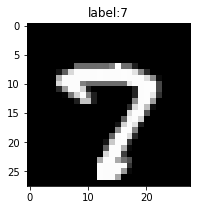

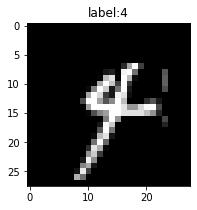

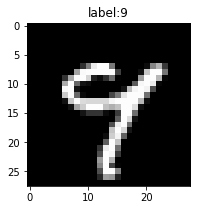

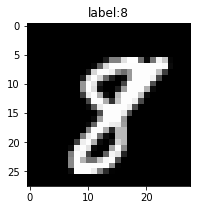

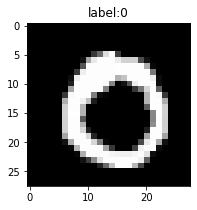

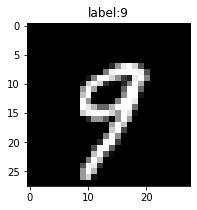

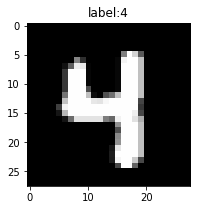

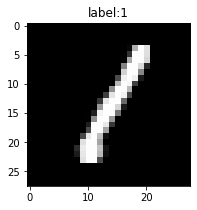

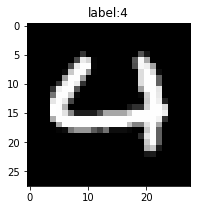

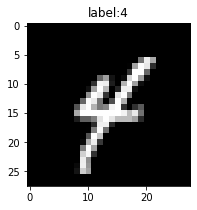

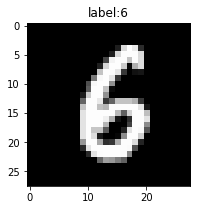

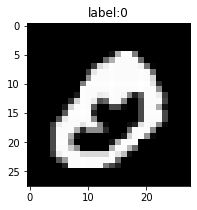

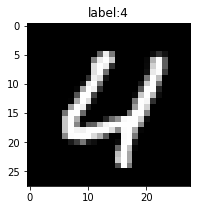

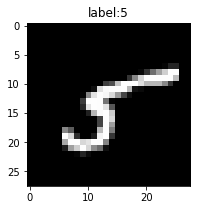

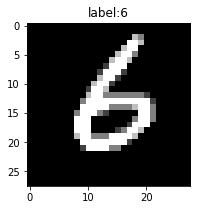

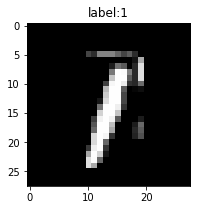

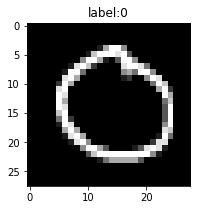

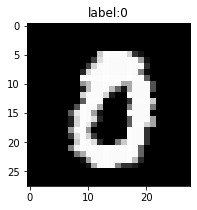

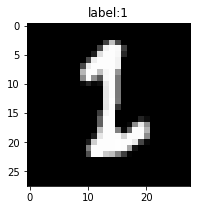

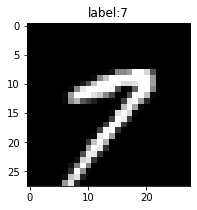

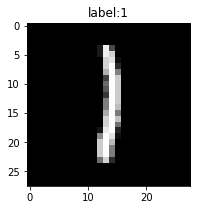

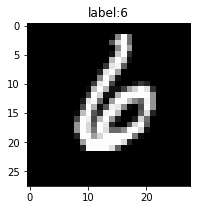

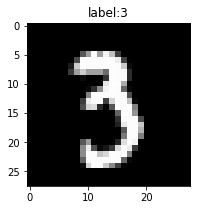

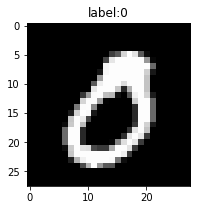

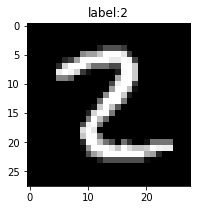

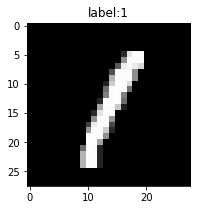

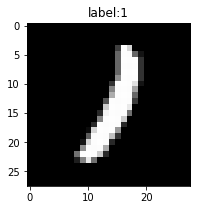

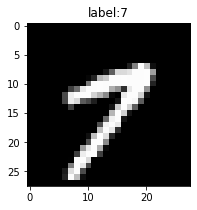

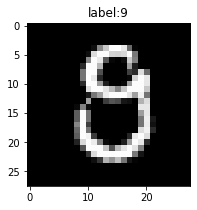

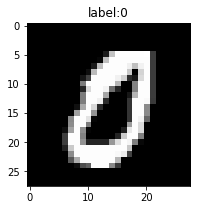

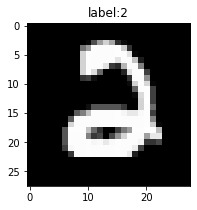

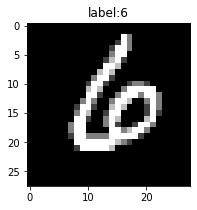

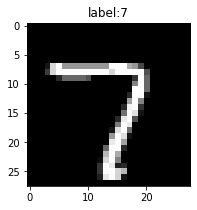

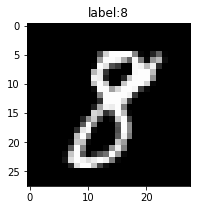

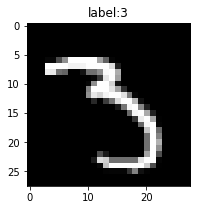

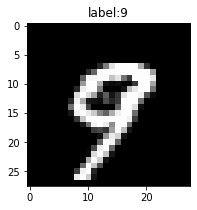

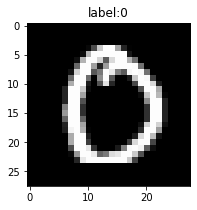

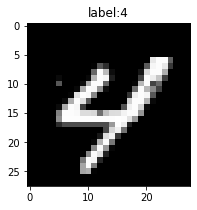

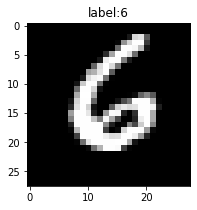

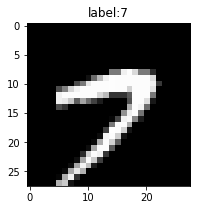

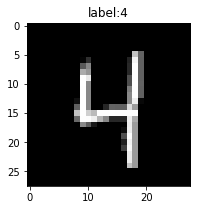

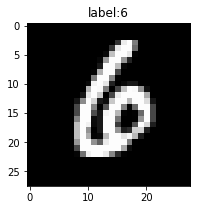

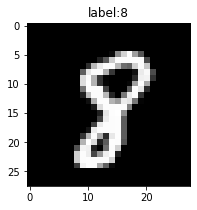

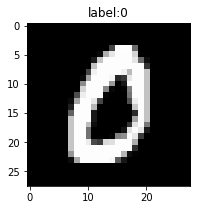

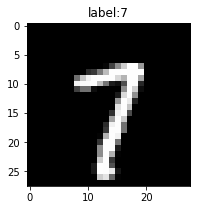

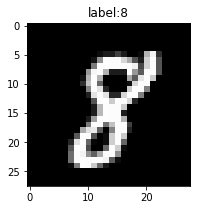

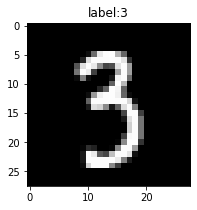

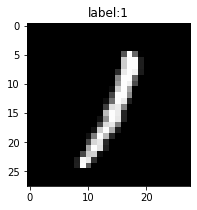

In [37]:
for i in range(1,100):
    plt.figure(figsize=(5,3))
    plt.imshow(X_train[i,:,:],'gray')
    plt.title("label:{}".format(y_train[i]))

In [38]:
X_train = X_train.reshape(60000,784)  ##Ann은 일단 1차원 데이터를 받음
X_test=X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [39]:
X_train /=255
X_test /= 255     ##Minmax_scaling하는스킬임

In [40]:
X_train.shape

(60000, 784)

## one hot encoding

In [50]:
from keras.utils import np_utils
n_classes = 10

In [51]:
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)

In [52]:
print(Y_train.shape)

(60000, 10)


In [53]:
model = Sequential()
input_shape = X_train.shape[1]
model.add(Dense(100,
               input_dim=input_shape,activation = 'relu' ))
model.add(Dense(10,activation = 'softmax'))


In [54]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ["accuracy"])

In [55]:
result = model.fit(X_train,Y_train,
                  batch_size=100, epochs = 20,
                  verbose = 0,
                  validation_data=(X_test,Y_test))

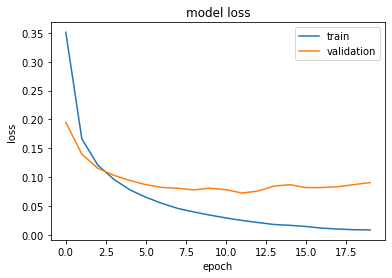

In [56]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc = 'upper right')